In [1]:
### Data Visualization Task 1

# Content:
#   The dataset contains transactions made by credit cards in September 2013 by European cardholders. 
#   This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 
#   transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all 
#   transactions.

#   It contains only numerical input variables which are the result of a PCA transformation. 
#   Unfortunately, due to confidentiality issues, we cannot provide the original features and more background 
#   information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only 
#   features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds 
#   elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the 
#   transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is 
#   the response variable and it takes value 1 in case of fraud and 0 otherwise.

#   Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall 
#   Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

# Problem:
#   This task is to use different visualization methods to interpret the data.


"\nContent:\nThe dataset contains transactions made by credit cards in September 2013 by European cardholders. \nThis dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.\n\nIt contains only numerical input variables which are the result of a PCA transformation. \nUnfortunately, due to confidentiality issues, we cannot provide the original features and more background \ninformation about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only \nfeatures which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds \nelapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction \nAmount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response \nvariable and 

In [20]:
# Task 1: Importing relevant libraries

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
# Task 2: Reading csv file
transactions = pd.read_csv('creditcard.csv')

In [22]:
# Task 3a: Finding how many rows and columns exist in our dataset
transactions.shape

(284807, 31)

In [23]:
# Task 3b: Getting a glimpse of how the data looks
transactions.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [24]:
# The transaction dataset shows 28 features, plus other columns 'Time', 'Amount', and 'Class'.
# One of the interesting columns is 'Class', which seems to be of binary input.

# Task 3c: Finding the attributes of a potential classifier

from collections import Counter
all_values_of_Class = np.unique(transactions['Class'])
print(all_values_of_Class)
print(Counter(transactions['Class'] == 1))

[0 1]
Counter({False: 284315, True: 492})


In [25]:
# Task 4: Finding any empty values
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Text(0, 0.5, 'V1')

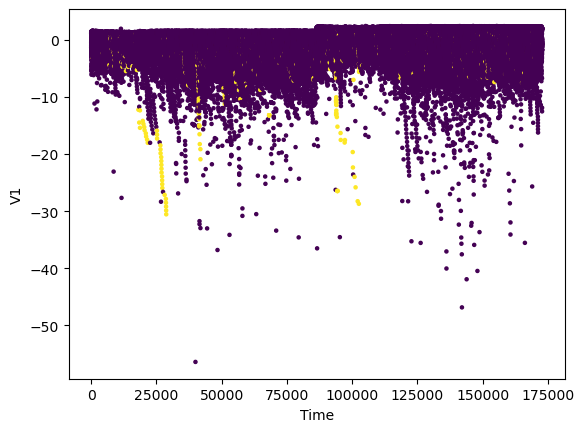

In [48]:
# It can be seen that there are no non-null values

# Task 5: Let's start with a premilinary plot
plt.scatter(transactions['Time'], transactions['V1'], c = transactions['Class'], s = 5)
plt.xlabel('Time')
plt.ylabel('V1')

In [38]:
# Not much of an insight! Let's plot other features with respect to time

fig, axes = plt.subplots(9, 3, figsize = [60, 180])
axes[0, 0].scatter(transactions['Time'], transactions['V2'])
axes[0, 0].set_title('Time v. V2')
axes[0, 1].scatter(transactions['Time'], transactions['V3'])
axes[0, 1].set_title('Time v. V3')
axes[0, 2].scatter(transactions['Time'], transactions['V4'])
axes[0, 2].set_title('Time v. V4')
axes[1, 0].scatter(transactions['Time'], transactions['V5'])
axes[1, 0].set_title('Time v. V5')
axes[1, 1].scatter(transactions['Time'], transactions['V6'])
axes[1, 1].set_title('Time v. V6')
axes[1, 2].scatter(transactions['Time'], transactions['V7'])
axes[1, 2].set_title('Time v. V7')
axes[2, 0].scatter(transactions['Time'], transactions['V8'])
axes[2, 0].set_title('Time v. V8')
axes[2, 1].scatter(transactions['Time'], transactions['V9'])
axes[2, 1].set_title('Time v. V9')
axes[2, 2].scatter(transactions['Time'], transactions['V10'])
axes[2, 2].set_title('Time v. V10')
axes[3, 0].scatter(transactions['Time'], transactions['V11'])
axes[3, 0].set_title('Time v. V11')
axes[3, 1].scatter(transactions['Time'], transactions['V12'])
axes[3, 1].set_title('Time v. V12')
axes[3, 2].scatter(transactions['Time'], transactions['V13'])
axes[3, 2].set_title('Time v. V13')
axes[4, 0].scatter(transactions['Time'], transactions['V14'])
axes[4, 0].set_title('Time v. V14')
axes[4, 1].scatter(transactions['Time'], transactions['V15'])
axes[4, 1].set_title('Time v. V15')
axes[4, 2].scatter(transactions['Time'], transactions['V16'])
axes[4, 2].set_title('Time v. V16')
axes[5, 0].scatter(transactions['Time'], transactions['V17'])
axes[5, 0].set_title('Time v. V17')
axes[5, 1].scatter(transactions['Time'], transactions['V18'])
axes[5, 1].set_title('Time v. V18')
axes[5, 2].scatter(transactions['Time'], transactions['V19'])
axes[5, 2].set_title('Time v. V19')
axes[6, 0].scatter(transactions['Time'], transactions['V20'])
axes[6, 0].set_title('Time v. V20')
axes[6, 1].scatter(transactions['Time'], transactions['V21'])
axes[6, 1].set_title('Time v. V21')
axes[6, 2].scatter(transactions['Time'], transactions['V22'])
axes[6, 2].set_title('Time v. V22')
axes[7, 0].scatter(transactions['Time'], transactions['V23'])
axes[7, 0].set_title('Time v. V23')
axes[7, 1].scatter(transactions['Time'], transactions['V24'])
axes[7, 1].set_title('Time v. V24')
axes[7, 2].scatter(transactions['Time'], transactions['V25'])
axes[7, 2].set_title('Time v. V25')
axes[8, 0].scatter(transactions['Time'], transactions['V26'])
axes[8, 0].set_title('Time v. V26')
axes[8, 1].scatter(transactions['Time'], transactions['V27'])
axes[8, 1].set_title('Time v. V27')
axes[8, 2].scatter(transactions['Time'], transactions['V28'])
axes[8, 2].set_title('Time v. V28')

Text(0.5, 1.0, 'Time v. V28')

In [ ]:
%%timeit
# A better way to write this code is to include loops


fig, axes = plt.subplots(7, 4, figsize = [60, 140])
for i in range(0, 7):
    for j in range(0, 4):
        num = (i + 1) * (j + 1)
        feature_nr = str(num)
        feature_nr = 'V' + feature_nr
        axes[i, j].scatter(transactions['Time'], transactions[feature_nr], c = transactions['Class'])
        axes[i, j].set_title('Time v. V' + feature_nr)